In [ ]:
import pandas as pd
import plotly.express as px
from scipy.stats import skew
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency, f_oneway
from sklearn.feature_selection import mutual_info_classif, f_classif
import numpy as np
from scipy.stats import boxcox, skew
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("D:\\GIT HUB\\GUVI Mini Proj 4\\train_data - train_data.csv")

In [ ]:

df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train.shape
df_test.shape

(26476, 14)

In [ ]:
# we updated the frequency encoding with target encoding
# model_en = data['page2_clothing_model'].value_counts()
# data['model_encoded'] = data['page2_clothing_model'].map(model_en)
# data.drop(columns='page2_clothing_model',inplace= True)

In [9]:
# finding the skewness
cont_col = ['order', 'price']
for i in cont_col:
    skewness_value = skew(df_train[i].values)
    if skewness_value > 1:
        #(Highly Asymmetrical) | Transformation is strongly recommended.
        print(f"The skewness of the {i} column is: {skewness_value:.4f} and it is < 1 so highly skewed(positive)")
    if skewness_value >= 0.5 and skewness_value <= 1:
        #Transformation is often beneficial, but not always critical
        print(f"The skewness of the {i} column is: {skewness_value:.4f} and it is < 0.5 so skewed")
    if skewness_value >= -0.5 and skewness_value <= 0.5:
        #n(Approximately Symmetrical) | No transformation typically needed
        print(f"The skewness of the {i} column is: {skewness_value:.4f} and it is near 0  so not skewed")
    if skewness_value <= -1 :
        #(Highly Asymmetrical) | Transformation is strongly recommended.
        print(f"The skewness of the {i} column is: {skewness_value:.4f} and it is > -1 so highly skewed(negative)")
    if skewness_value <= -0.5 and skewness_value <= -1:
        #Transformation is often beneficial, but not always critical
        print(f"The skewness of the {i} column is: {skewness_value:.4f} and it is > -0.5 so skewed")  

The skewness of the order column is: 4.4628 and it is < 1 so highly skewed(positive)
The skewness of the price column is: 0.5254 and it is < 0.5 so skewed


In [10]:
# perfroming transformation on skewed features
import numpy as np
from scipy.stats import boxcox, skew
cont_col = ['order', 'price']
# --- 2. Perform Transformations ---
transform_df = df_train[['order','price']] 

for i in cont_col:
    # 1. Log Transformation (np.log) - Most aggressive
    transform_df[f'{i}_log'] = np.log(transform_df[i])

    # 2. Square Root Transformation (np.sqrt) - Milder
    transform_df[f'{i}_sqrt'] = np.sqrt(transform_df[i])

    # 3. Cube Root Transformation (np.cbrt or power 1/3) - Milder than Log
    transform_df[f'{i}_cbrt'] = np.cbrt(transform_df[i])

    # 4. Box-Cox Transformation - Finds the optimal power (lambda)
    # Note: boxcox() returns two things: the transformed data and the optimal lambda.
    transform_df[f'{i}_boxcox'], optimal_lambda = boxcox(transform_df[i])


# --- 3. Display Results (New Columns and Skewness) ---

    print("--- Skewness Comparison ---")
    print(f"Original {i} Skew: {skew(transform_df[i].values):.4f}")
    print(f"Log Transformed Skew: {skew(transform_df[f'{i}_log'].values):.4f}")
    print(f"Square Root Skew: {skew(transform_df[f'{i}_sqrt'].values):.4f}")
    print(f"Cube Root Skew: {skew(transform_df[f'{i}_cbrt'].values):.4f}")
    print(f"Box-Cox Transformed Skew: {skew(transform_df[f'{i}_boxcox'].values):.4f}")
    print(f"\nOptimal Lambda (Box-Cox): {optimal_lambda:.4f}")

print("\n--- Transformed Data Head ---")
transform_df.head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_11292\4244884290.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transform_df[f'{i}_log'] = np.log(transform_df[i])
C:\Users\Hp\AppData\Local\Temp\ipykernel_11292\4244884290.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transform_df[f'{i}_sqrt'] = np.sqrt(transform_df[i])
C:\Users\Hp\AppData\Local\Temp\ipykernel_11292\4244884290.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

--- Skewness Comparison ---
Original order Skew: 4.4628
Log Transformed Skew: 0.1333
Square Root Skew: 1.6300
Cube Root Skew: 1.0294
Box-Cox Transformed Skew: 0.0136

Optimal Lambda (Box-Cox): -0.0548
--- Skewness Comparison ---
Original price Skew: 0.5254
Log Transformed Skew: -0.1245
Square Root Skew: 0.2049
Cube Root Skew: 0.0967
Box-Cox Transformed Skew: -0.0078

Optimal Lambda (Box-Cox): 0.1745

--- Transformed Data Head ---


C:\Users\Hp\AppData\Local\Temp\ipykernel_11292\4244884290.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transform_df[f'{i}_boxcox'], optimal_lambda = boxcox(transform_df[i])


,order,price,order_log,order_sqrt,order_cbrt,order_boxcox,price_log,price_sqrt,price_cbrt,price_boxcox
78260,2,38,0.693147,1.414214,1.259921,0.680154,3.637586,6.164414,3.361975,5.080116
5753,6,48,1.791759,2.449490,1.817121,1.706646,3.871201,6.928203,3.634241,5.529871
60138,5,82,1.609438,2.236068,1.709976,1.540539,4.406719,9.055385,4.344481,6.632712
115851,3,72,1.098612,1.732051,1.442250,1.066212,4.276666,8.485281,4.160168,6.355335
84009,7,28,1.945910,2.645751,1.912931,1.845799,3.332205,5.291503,3.036589,4.519170


In [12]:
# Finding the kurtosis on the features
from scipy.stats import kurtosis
cont_col1 = ['order','order_log', 'order_sqrt', 'order_cbrt','order_boxcox', 'price', 'price_log', 'price_sqrt', 'price_cbrt','price_boxcox']
for i in cont_col1:
    original_kurtosis = kurtosis(transform_df[i].values)

    print(f"Excess Kurtosis ({i}): {original_kurtosis:.4f}")


Excess Kurtosis (order): 32.5589
Excess Kurtosis (order_log): -0.6032
Excess Kurtosis (order_sqrt): 4.2823
Excess Kurtosis (order_cbrt): 1.4693
Excess Kurtosis (order_boxcox): -0.7015
Excess Kurtosis (price): -0.1400
Excess Kurtosis (price_log): -0.4241
Excess Kurtosis (price_sqrt): -0.4481
Excess Kurtosis (price_cbrt): -0.4776
Excess Kurtosis (price_boxcox): -0.4712


In [13]:
# Transforming the skewed features using the best transforming methods after analysing the skewness and kurtosis 
df_train['price_transformed'], optimal_lambda = boxcox(df_train['price'])
df_train['order_transformed'] = np.log(df_train['order'])

In [14]:
cat_col = ['month', 'day', 'country', 'session_id','page2_clothing_model',
           'page1_main_category', 'colour', 'location', 'model_photography', 'page']
cont_col = ['order','price','price_transformed','order_transformed']
target_col = ['price_2']
relevant = []

In [15]:
#hypothesis testing
# ==========================================================
# SCENARIO 2: CONTINUOUS vs. CATEGORICAL
# Test: ANOVA (Analysis of Variance) - General case for F-Test
# Example: Income (Cont. Feature) vs. Target_Cat (Cat. Target)
# Goal: Check if mean Income is different across Default groups (0 vs 1)
# ==========================================================
alpha = 0.05 # Significance Level

print("2. CONTINUOUS vs. CATEGORICAL (Income vs. Target_Cat)")

# Separate the continuous data into groups based on the categorical target
# group0 = df[df['Target_Cat'] == 0]['Income']
# group1 = df[df['Target_Cat'] == 1]['Income']

for i in cont_col:
    group1 = df_train[df_train['price_2'] == 1][i]
    group2 = df_train[df_train['price_2'] == 2][i]
    # The f_oneway test performs ANOVA (for 2+ groups)
    f_statistic, p_value = f_oneway(group1, group2)
    print(f"   F-Statistic: {f_statistic:.3f}")
    print(f"   P-Value: {p_value:.5f}")

    if p_value < alpha:
        print(f"   ✅ **Conclusion: Reject Null Hypothesis.** Mean {i} is significantly different between Price_2 groups.")
        relevant.append(i)
    else:
        print(f"   ❌ Conclusion: Fail to Reject Null Hypothesis. Mean {i} is NOT significantly different between Default groups.")
    print("-" * 30)
    






2. CONTINUOUS vs. CATEGORICAL (Income vs. Target_Cat)
   F-Statistic: 0.013
   P-Value: 0.90808
   ❌ Conclusion: Fail to Reject Null Hypothesis. Mean order is NOT significantly different between Default groups.
------------------------------
   F-Statistic: 130218.283
   P-Value: 0.00000
   ✅ **Conclusion: Reject Null Hypothesis.** Mean price is significantly different between Price_2 groups.
------------------------------
   F-Statistic: 138635.954
   P-Value: 0.00000
   ✅ **Conclusion: Reject Null Hypothesis.** Mean price_transformed is significantly different between Price_2 groups.
------------------------------
   F-Statistic: 2.561
   P-Value: 0.10956
   ❌ Conclusion: Fail to Reject Null Hypothesis. Mean order_transformed is NOT significantly different between Default groups.
------------------------------


In [16]:
#hypothesis testing
# ==========================================================
# SCENARIO 3: CATEGORICAL vs. CATEGORICAL
# Test: Chi-Square Test
# Example: Region (Cat. Feature) vs. Target_Cat (Cat. Target)
# Goal: Check if the distribution of Target_Cat is dependent on Region
# ==========================================================

print("3. CATEGORICAL vs. CATEGORICAL (Region vs. Target_Cat)")

alpha = 0.05 # Significance Level
# Create a Contingency Table (crosstab)
# contingency_table = pd.crosstab(df['Region'], df['Target_Cat'])

for i in cat_col:
    contingency_table = pd.crosstab(df_train[i], df_train['price_2'])

    # The chi2_contingency test returns: chi2 stat, p-value, df, expected freqs
    chi2_stat, p_value, degrees_of_freedom, expected_freqs = chi2_contingency(contingency_table)

    print("   Contingency Table:")
    print(contingency_table)
    print(f"   Chi-Square Stat: {chi2_stat:.3f}")
    print(f"   P-Value: {p_value:.5f}")

    if p_value < alpha:
        print(f"   ✅ **Conclusion: Reject Null Hypothesis.** {i} and Price_2 are dependent (relevant).")
        relevant.append(i)
    else:
        print(f"   ❌ Conclusion: Fail to Reject Null Hypothesis. {i} and Price_2 are independent (not relevant).")
    print("-" * 30)

3. CATEGORICAL vs. CATEGORICAL (Region vs. Target_Cat)
   Contingency Table:
price_2      1      2
month                
4        15878  15069
5        11499  11488
6        10307  10312
7        11562  10751
8         4912   4125
   Chi-Square Stat: 64.222
   P-Value: 0.00000
   ✅ **Conclusion: Reject Null Hypothesis.** month and Price_2 are dependent (relevant).
------------------------------
   Contingency Table:
price_2     1     2
day                
1        2382  2153
2        2427  2235
3        1974  1906
4        2139  1979
5        2078  1884
6        2047  1961
7        2038  1888
8        2164  2083
9        1969  1863
10       1996  1982
11       2070  2009
12       2061  1968
13       1376  1393
14       1786  1670
15       1493  1490
16       1838  1807
17       1634  1606
18       1574  1482
19       1519  1508
20       1491  1413
21       1630  1541
22       1660  1444
23       1662  1620
24       1600  1675
25       1520  1532
26       1357  1282
27       1383  1299


In [ ]:
# relevant features
# ['price', --- not req
#  'price_transformed', --- cont
#  'month', --- OHE
#  'country', --- Target encode
#  'session_id', --- unique (not req)
#  'page2_clothing_model', --- Target encode - already done a frequecny
#  'page1_main_category', --- OHE
#  'colour', --- OHE
#  'location', --- OHE
#  'model_photography', --- OHE
#  'page', --- no encoding(ordinal)
#  'model_encoded'] --- already done a frequecny

In [17]:
df_train.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page,price_transformed,order_transformed
78260,2008,7,4,2,29,17592,3,C53,14,6,1,38,2,3,5.080116,0.693147
5753,2008,6,1,6,29,12203,2,B9,1,3,1,48,2,1,5.529871,1.791759
60138,2008,4,15,5,9,3938,1,A9,3,3,1,82,1,1,6.632712,1.609438
115851,2008,7,6,3,29,17794,1,A3,3,1,1,72,1,1,6.355335,1.098612
84009,2008,6,18,7,29,15077,4,P61,1,3,2,28,2,4,4.519170,1.945910


In [18]:
# Outlier detection

# import pandas as pd
# import numpy as np

# 2. Function to detect outliers using the IQR method (1.5 * IQR Rule)
def detect_iqr_outliers(data, column, factor=1.5):
    """Detects outliers using the IQR method for a given continuous column."""
    
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the bounds
    lower_bound = Q1 - (factor * IQR)
    upper_bound = Q3 + (factor * IQR)
    
    # Identify the outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    # Report the findings
    print(f"\n--- Outlier Analysis for '{column}' ---")
    print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}")
    print(f"Upper Bound: {upper_bound:.2f}")
    print(f"Total Outliers Found: {len(outliers)}")
    
    if not outliers.empty:
        # Show the actual outlier values
        print(f"Outlier Values:")
        print(outliers[[column]])
    else:
        print("No outliers found.")
    
    return outliers, lower_bound, upper_bound

# 3. Define the continuous columns
# continuous_features = ['Price', 'Area'] 

# 4. Loop through the continuous columns and apply the detection function
# all_outliers = {}
# for feature in continuous_features:
#     outliers, lower_bound, upper_bound = detect_iqr_outliers(df, feature)
#     all_outliers[feature] = {'outliers': outliers, 'lower': lower_bound, 'upper': upper_bound}

In [19]:
# 4. Loop through the continuous columns and apply the detection function
all_outliers = {}
for feature in cont_col:
    outliers, lower_bound, upper_bound = detect_iqr_outliers(df_train, feature)
    all_outliers[feature] = {'outliers': outliers, 'lower': lower_bound, 'upper': upper_bound}


--- Outlier Analysis for 'order' ---
Q1: 2.00, Q3: 12.00, IQR: 10.00
Lower Bound: -13.00
Upper Bound: 27.00
Total Outliers Found: 7308
Outlier Values:
        order
98961      31
128684     61
71417      35
97096      42
83715      35
...       ...
52256      36
38660      48
106530     72
119346     37
5311       41

[7308 rows x 1 columns]

--- Outlier Analysis for 'price' ---
Q1: 33.00, Q3: 52.00, IQR: 19.00
Lower Bound: 4.50
Upper Bound: 80.50
Total Outliers Found: 1233
Outlier Values:
        price
60138      82
116171     82
56288      82
68443      82
71952      82
...       ...
18070      82
131926     82
52733      82
13545      82
64925      82

[1233 rows x 1 columns]

--- Outlier Analysis for 'price_transformed' ---
Q1: 4.82, Q3: 5.69, IQR: 0.87
Lower Bound: 3.51
Upper Bound: 6.99
Total Outliers Found: 0
No outliers found.

--- Outlier Analysis for 'order_transformed' ---
Q1: 0.69, Q3: 2.48, IQR: 1.79
Lower Bound: -1.99
Upper Bound: 5.17
Total Outliers Found: 26
Outlier Va

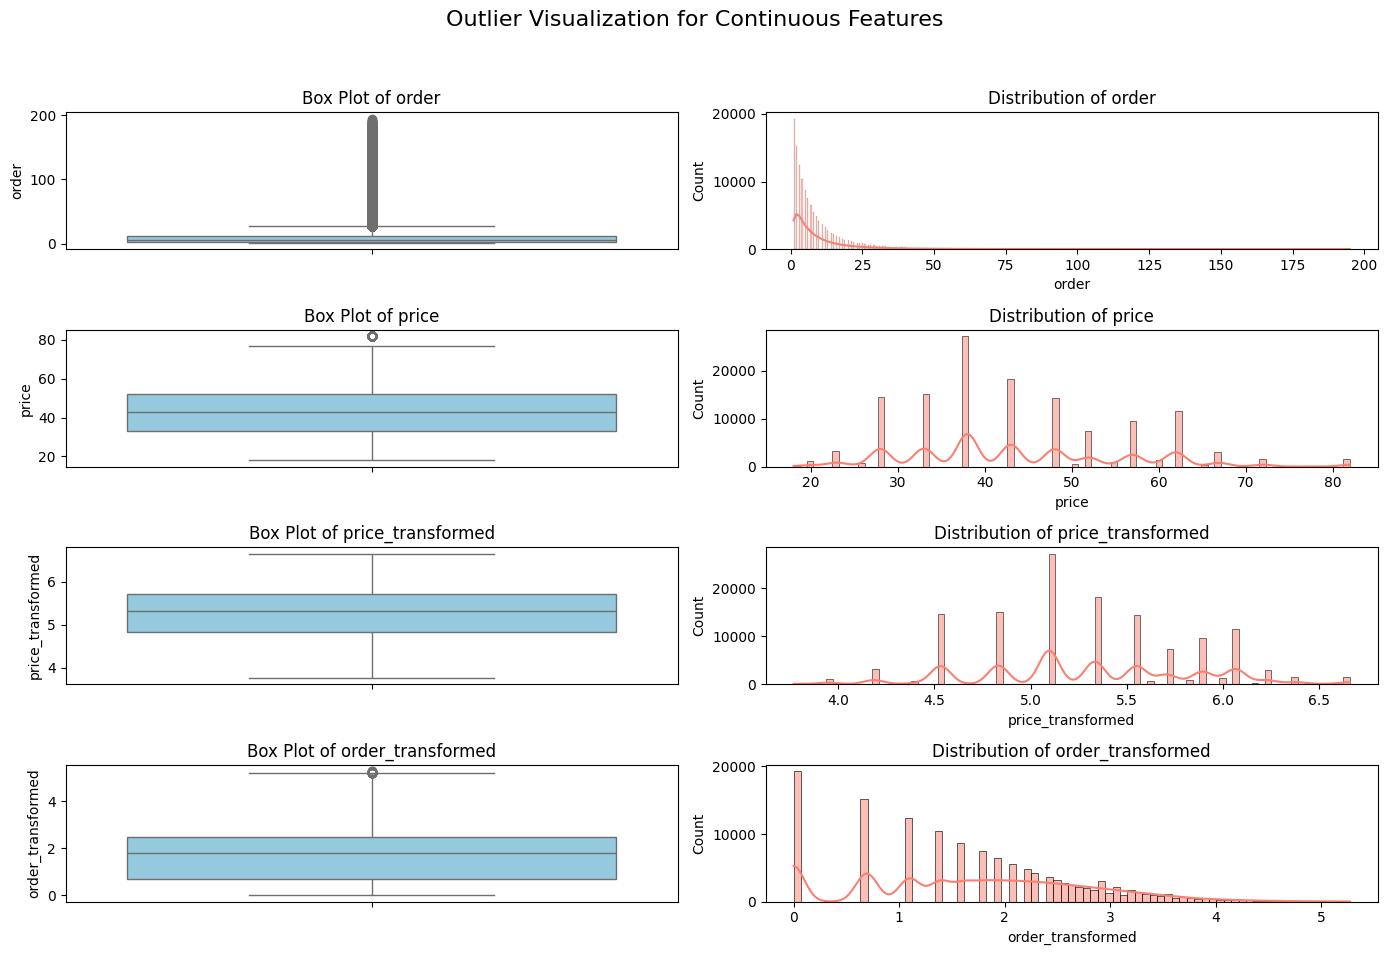

In [ ]:
# import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 3. Create a visualization to show outliers
fig, axes = plt.subplots(4, 2, figsize=(14, 10))
fig.suptitle('Outlier Visualization for Continuous Features', fontsize=16)
plot_index = 0

for feature in cont_col:
    # A. Box Plot: Best visualization for the IQR method
    sns.boxplot(y=df_train[feature], ax=axes[plot_index, 0], color='skyblue')
    axes[plot_index, 0].set_title(f'Box Plot of {feature}', fontsize=12)
    axes[plot_index, 0].set_ylabel(feature)

    # B. Histogram / Distribution Plot: Shows overall data spread
    sns.histplot(df_train[feature], kde=True, ax=axes[plot_index, 1], color='salmon')
    axes[plot_index, 1].set_title(f'Distribution of {feature}', fontsize=12)
    axes[plot_index, 1].set_xlabel(feature)
    
    plot_index += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('continuous_feature_outliers_visualization.png')
plt.show() # Note: This line is removed for notebook execution.

In [20]:
# Winsorizing /Capping feature to upper bound
df_train['order_capped'] = df_train['order_transformed'].apply(lambda i : 5.17 if i > 5.17 else i) 

In [21]:
# 4. Loop through the continuous columns and apply the detection function
all_outliers = {}
outliers, lower_bound, upper_bound = detect_iqr_outliers(df_train,'order_capped' )
all_outliers[feature] = {'outliers': outliers, 'lower': lower_bound, 'upper': upper_bound}


--- Outlier Analysis for 'order_capped' ---
Q1: 0.69, Q3: 2.48, IQR: 1.79
Lower Bound: -1.99
Upper Bound: 5.17
Total Outliers Found: 0
No outliers found.


In [ ]:
# The IQR method is generally the better and safer choice for initial outlier detection in real-world data 
# because it is more robust and less susceptible to the masking effect. 
# The Z-score method is best reserved for data that is known to follow a Normal (Gaussian) distribution.

In [22]:
# Import the zscore function from SciPy
from scipy.stats import zscore

# 2. Function to detect outliers using the Z-score method
def detect_zscore_outliers(data, column, threshold=3):
    """
    Detects outliers using the Z-score method (|Z| > threshold).
    """
    
    # Calculate Z-scores for the column
    # The zscore function automatically handles mean and standard deviation calculation
    z_scores = zscore(data[column])
    
    # Create a boolean mask where absolute Z-score is greater than the threshold
    outliers_mask = np.abs(z_scores) > threshold
    
    # Filter the original data using the mask
    outliers = data[outliers_mask]
    
    # Report the findings
    print(f"\n--- Z-Score Outlier Analysis for '{column}' (Threshold: |Z| > {threshold}) ---")
    print(f"Total Outliers Found: {len(outliers)}")
    
    if not outliers.empty:
        # Show the actual outlier values and their calculated Z-scores
        outlier_data = outliers.copy()
        # Add Z-Score back to the outlier dataframe for easy viewing
        outlier_data[f'Z_Score'] = z_scores[outliers_mask]
        print(f"Outlier Values and Z-Scores:")
        print(outlier_data[[column, f'Z_Score']].sort_values(by=f'Z_Score', ascending=False))
    else:
        print("No outliers found.")
    
    return outliers

# # 3. Define the continuous columns and run the analysis
# continuous_features = ['Price', 'Area'] 

for feature in cont_col:
    detect_zscore_outliers(df_train, feature, threshold=3)




--- Z-Score Outlier Analysis for 'order' (Threshold: |Z| > 3) ---
Total Outliers Found: 2064
Outlier Values and Z-Scores:
        order    Z_Score
92582     195  13.843428
15266     191  13.544445
88128     191  13.544445
111344    190  13.469699
51356     189  13.394953
...       ...        ...
93625      50   3.005302
125563     50   3.005302
18628      50   3.005302
82924      50   3.005302
9494       50   3.005302

[2064 rows x 2 columns]

--- Z-Score Outlier Analysis for 'price' (Threshold: |Z| > 3) ---
Total Outliers Found: 1233
Outlier Values and Z-Scores:
        price   Z_Score
60138      82  3.050754
116171     82  3.050754
56288      82  3.050754
68443      82  3.050754
71952      82  3.050754
...       ...       ...
18070      82  3.050754
131926     82  3.050754
52733      82  3.050754
13545      82  3.050754
64925      82  3.050754

[1233 rows x 2 columns]

--- Z-Score Outlier Analysis for 'price_transformed' (Threshold: |Z| > 3) ---
Total Outliers Found: 0
No outliers f

In [23]:
detect_zscore_outliers(df_train, "order_capped", threshold=3)


--- Z-Score Outlier Analysis for 'order_capped' (Threshold: |Z| > 3) ---
Total Outliers Found: 106
Outlier Values and Z-Scores:
        order_capped   Z_Score
68360       5.170000  3.204849
16790       5.170000  3.204849
9362        5.170000  3.204849
102100      5.170000  3.204849
88128       5.170000  3.204849
...              ...       ...
52178       4.962845  3.013841
24050       4.955827  3.007370
102928      4.955827  3.007370
34315       4.948760  3.000854
28369       4.948760  3.000854

[106 rows x 2 columns]


,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page,price_transformed,order_transformed,order_capped
61809,2008,6,10,148,9,13846,3,C28,2,4,2,48,1,2,5.529871,4.997212,4.997212
26682,2008,8,3,144,29,22433,1,A28,1,4,2,43,2,2,5.315813,4.969813,4.969813
16790,2008,6,10,177,9,13846,3,C49,4,5,2,26,2,3,4.387490,5.176150,5.170000
111123,2008,8,3,151,29,22433,1,A41,4,2,1,43,2,3,5.315813,5.017280,5.017280
33404,2008,8,6,158,29,22902,1,A16,1,6,1,33,2,1,4.817257,5.062595,5.062595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102928,2008,6,10,142,9,13846,3,C24,12,2,1,33,2,2,4.817257,4.955827,4.955827
107904,2008,8,3,180,29,22433,3,C45,11,3,1,55,1,3,5.800530,5.192957,5.170000
120674,2008,8,6,169,29,22902,1,A26,2,3,1,38,2,2,5.080116,5.129899,5.129899
51356,2008,6,10,189,9,13846,3,C56,6,1,2,57,1,4,5.872616,5.241747,5.170000


In [ ]:
# Re-encoding
# split the data into test and train and perform all these actions in train - step 1


In [ ]:
# relevant features
# ['price', --- not req - done
#  'price_transformed', --- cont
#  'month',5 --- OHE
#  'country',46 --- grouped and OHE  - done
#  'session_id', --- unique (not req) - to be removed-----------------------------------------
#  'page2_clothing_model',216 --- Target encode - done
#  'page1_main_category',4 --- OHE
#  'colour',14 --- OHE to be grouped and OHE
#  'location',6 --- OHE 
#  'model_photography',2 --- OHE - label(binary) with 0/1
#  'page', --- label(ordinal) - already done
#  'model_encoded'] --- already done a frequecny ----to be removed-------------------------------
# ohe=['month','page1_main_category','colour','location']

In [24]:
# import pandas as pd
# import numpy as np

# # For demonstration, we'll re-create the DataFrame with high cardinality
# # In your real environment, you would load your existing 'df'.
# np.random.seed(42)
# N = 1000 
# countries_list = ['USA'] * 300 + ['Germany'] * 250 + ['UK'] * 150 + ['France'] * 100 
# num_rare_countries = 43
# rare_country_data = [f'Country_{i}' for i in range(num_rare_countries) for _ in range(5)]
# countries_list += rare_country_data 
# countries_list = countries_list[:N] 
# np.random.shuffle(countries_list)

# models_list = ['Model_A'] * 100 + ['Model_B'] * 80 + ['Model_C'] * 60
# num_rare_models = 213
# rare_model_data = [f'Model_{i}' for i in range(num_rare_models) for _ in range(4)]
# models_list += rare_model_data
# models_list = models_list[:N]
# np.random.shuffle(models_list)

# df = pd.DataFrame({
#     'country': countries_list,
#     'page2_clothing_model': models_list,
#     'target': np.random.randint(0, 2, size=N) 
# })

# --- Main Grouping Function ---
def group_rare_categories(df, column_name, min_percentage=0.01, rare_label='RARE_GROUP'):
    """
    Groups categories in a specified column that fall below a minimum
    percentage threshold into a single 'RARE_GROUP' and returns the updated DataFrame.
    
    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - column_name (str): The name of the categorical column to process.
    - min_percentage (float): The threshold (e.g., 0.01 for 1%).
    - rare_label (str): The label to use for the grouped rare categories.
    """
    
    # 1. Calculate the normalized frequency counts
    value_counts = df[column_name].value_counts(normalize=True)
    
    # 2. Identify the categories to be grouped
    rare_categories = value_counts[value_counts < min_percentage].index.tolist()
    
    # Check if grouping is necessary
    if not rare_categories:
        print(f"No categories in '{column_name}' were below the {min_percentage*100:.2f}% threshold. Skipping.")
        return df
    
    # 3. Create the new column name
    new_column_name = f'{column_name}_grouped'
    df[new_column_name] = df[column_name].copy()
    
    # 4. Apply the grouping using .loc for efficient assignment
    df.loc[df[column_name].isin(rare_categories), new_column_name] = rare_label
    
    # 5. Report summary
    original_cardinality = df[column_name].nunique()
    new_cardinality = df[new_column_name].nunique()
    
    print(f"\n--- Grouping Summary for '{column_name}' (Threshold: {min_percentage*100:.2f}%) ---")
    print(f"Original Cardinality: {original_cardinality}")
    print(f"Categories Grouped into '{rare_label}': {len(rare_categories)}")
    print(f"New Cardinality: {new_cardinality}")
    
    return df

In [25]:
# A. Grouping 'country' (Original Card: 46)
# Using a 1% threshold
df = group_rare_categories(df_train, 'country', min_percentage=0.01)

# B. Grouping 'page2_clothing_model' (Original Card: 216)
# Using a slightly lower 0.5% threshold to ensure more rare models are grouped
df = group_rare_categories(df_train, 'page2_clothing_model', min_percentage=0.005)

# 3. Final Verification of the New Columns
print("\n--- Final Grouped Data Head ---")
print(df[['country', 'country_grouped', 'page2_clothing_model', 'page2_clothing_model_grouped']].head())
print("\nFinal Value Counts for 'country_grouped':")
print(df['country_grouped'].value_counts())
print("\nFinal Value Counts for 'page2_clothing_model_grouped':")
print(df['page2_clothing_model_grouped'].value_counts())


--- Grouping Summary for 'country' (Threshold: 1.00%) ---
Original Cardinality: 44
Categories Grouped into 'RARE_GROUP': 40
New Cardinality: 5

--- Grouping Summary for 'page2_clothing_model' (Threshold: 0.50%) ---
Original Cardinality: 216
Categories Grouped into 'RARE_GROUP': 145
New Cardinality: 72

--- Final Grouped Data Head ---
        country country_grouped page2_clothing_model  \
78260        29              29                  C53   
5753         29              29                   B9   
60138         9               9                   A9   
115851       29              29                   A3   
84009        29              29                  P61   

       page2_clothing_model_grouped  
78260                    RARE_GROUP  
5753                             B9  
60138                            A9  
115851                           A3  
84009                    RARE_GROUP  

Final Value Counts for 'country_grouped':
country_grouped
29            85683
9             11615

C:\Users\Hp\AppData\Local\Temp\ipykernel_11292\3883849262.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'RARE_GROUP' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[column_name].isin(rare_categories), new_column_name] = rare_label


In [27]:
df_train = df_train.reset_index(drop=True)

In [28]:
# target encoding and OHE
# import pandas as pd
# import numpy as np
from category_encoders import TargetEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder

# Assume 'df' is your DataFrame with 'country_grouped', 'page2_clothing_model_grouped', and 'target'
# (The 'target' is your classification outcome, e.g., 'purchased' or 'converted')

# --- 1. Target Encoding Setup for 'page2_clothing_model_grouped' ---

# We will use StratifiedKFold to ensure the target ratio is preserved in each fold
NFOLDS = 5
kf = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=42)

# Create a placeholder column for the encoded feature
df_train['model_target_encoded'] = np.nan

# Perform Target Encoding via K-Fold Cross-Validation
for train_index, val_index in kf.split(df_train, df_train['price_2']):
    # Initialize TargetEncoder (smoothing is default and recommended)
    encoder = TargetEncoder()
    
    # Fit the encoder ONLY on the K-1 folds (train data)
    encoder.fit(df_train.iloc[train_index]['page2_clothing_model_grouped'], df_train.iloc[train_index]['price_2'])
    
    # Transform the remaining fold (validation data)
    # The transformation uses the means calculated from the train_index
    df_train.loc[val_index, 'model_target_encoded'] = encoder.transform(
        df_train.iloc[val_index]['page2_clothing_model_grouped']
    ).to_numpy().flatten()

# For any new data (when predicting), you must fit the encoder on the ENTIRE training set.
final_model_encoder = TargetEncoder()
final_model_encoder.fit(df_train['page2_clothing_model_grouped'], df_train['price_2'])


# --- 2. One-Hot Encoding for 'country_grouped' (The Simple, Safe Choice) ---

# Use pandas get_dummies for simple OHE
country_ohe = pd.get_dummies(df_train['country_grouped'], prefix='country', dtype=int)

# Concatenate the new OHE columns to the main DataFrame
df_train = pd.concat([df_train.drop('country_grouped', axis=1), country_ohe], axis=1)

# Display the result (replace 'page2_clothing_model_grouped' with the encoded column)
print("\n--- Final Encoded Features Head ---")
# print(data[['country_RARE_GROUP','model_target_encoded']].head())

print("\nTarget Encoding (model_target_encoded) is complete and leakage-free.")
print("One-Hot Encoding (country_...) is complete and safe.")


--- Final Encoded Features Head ---

Target Encoding (model_target_encoded) is complete and leakage-free.
One-Hot Encoding (country_...) is complete and safe.


In [ ]:
# Learn and understand the target encoding more

In [29]:
df_train.tail()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,...,price_transformed,order_transformed,order_capped,page2_clothing_model_grouped,model_target_encoded,country_9,country_24,country_29,country_46,country_RARE_GROUP
105898,2008,6,2,15,29,12417,4,P21,4,1,...,4.817257,2.708050,2.708050,RARE_GROUP,1.545677,0,0,1,0,0
105899,2008,5,7,1,29,7938,2,B17,6,6,...,5.080116,0.000000,0.000000,B17,2.000000,0,0,1,0,0
105900,2008,6,26,3,25,16249,4,P3,2,1,...,5.529871,1.098612,1.098612,P3,1.000000,0,0,0,0,1
105901,2008,6,9,1,29,13674,4,P16,7,6,...,4.817257,0.000000,0.000000,P16,2.000000,0,0,1,0,0
105902,2008,7,29,4,29,21622,1,A7,3,3,...,5.315813,1.386294,1.386294,A7,2.000000,0,0,1,0,0


In [ ]:
df = group_rare_categories(df_train, 'colour', min_percentage=0.01)
print("\nFinal Value Counts for 'colour':")
print(df['colour'].value_counts())
# this can be removed since the cardinality is not changed


--- Grouping Summary for 'colour' (Threshold: 1.00%) ---
Original Cardinality: 14
Categories Grouped into 'RARE_GROUP': 1
New Cardinality: 14

Final Value Counts for 'colour':
colour
2     19026
3     18710
6     11253
4     10599
14    10217
9      8697
12     5628
1      5052
7      4322
13     4059
11     3303
10     2256
8      1727
5      1054
Name: count, dtype: int64


C:\Users\Hp\AppData\Local\Temp\ipykernel_11292\3883849262.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'RARE_GROUP' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[column_name].isin(rare_categories), new_column_name] = rare_label


In [32]:
df_train.drop(columns='colour_grouped', inplace=True)

In [33]:
# one hot encoding
ohe=['month','page1_main_category','colour','location']
for i in ohe:
    # Use pandas get_dummies for simple OHE
    df_ohe = pd.get_dummies(df_train[i], prefix=i, dtype=int)

    # Concatenate the new OHE columns to the main DataFrame
    df_train = pd.concat([df_train.drop(i, axis=1), df_ohe], axis=1)

    # Display the result (replace 'page2_clothing_model_grouped' with the encoded column)
    # print("\n--- Final Encoded Features Head ---")
    # print(data[['country_RARE_GROUP','model_target_encoded']].head())

    
    print(f"One-Hot Encoding ({i}_...) is complete and safe.")

One-Hot Encoding (month_...) is complete and safe.
One-Hot Encoding (page1_main_category_...) is complete and safe.
One-Hot Encoding (colour_...) is complete and safe.
One-Hot Encoding (location_...) is complete and safe.


In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105903 entries, 0 to 105902
Data columns (total 49 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   year                          105903 non-null  int64  
 1   day                           105903 non-null  int64  
 2   order                         105903 non-null  int64  
 3   country                       105903 non-null  int64  
 4   session_id                    105903 non-null  int64  
 5   page2_clothing_model          105903 non-null  object 
 6   model_photography             105903 non-null  int64  
 7   price                         105903 non-null  int64  
 8   price_2                       105903 non-null  int64  
 9   page                          105903 non-null  int64  
 10  price_transformed             105903 non-null  float64
 11  order_transformed             105903 non-null  float64
 12  order_capped                  105903 non-nul

In [ ]:
# df_train steps ends here

In [45]:
# data.columns
# data1 = data.copy()
data1.drop(columns='page2_clothing_model_grouped',inplace=True)

In [46]:
data1.columns

Index(['year', 'day', 'order', 'country', 'session_id', 'model_photography',
       'price', 'price_2', 'page', 'model_encoded', 'price_transformed',
       'order_transformed', 'order_capped', 'model_target_encoded',
       'country_9', 'country_24', 'country_29', 'country_46',
       'country_RARE_GROUP', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'page1_main_category_1', 'page1_main_category_2',
       'page1_main_category_3', 'page1_main_category_4', 'colour_1',
       'colour_2', 'colour_3', 'colour_4', 'colour_5', 'colour_6', 'colour_7',
       'colour_8', 'colour_9', 'colour_10', 'colour_11', 'colour_12',
       'colour_13', 'colour_14', 'location_1', 'location_2', 'location_3',
       'location_4', 'location_5', 'location_6'],
      dtype='object')

In [55]:
data1.drop(columns=['year','day','order', 'country', 'session_id','price','model_encoded','order_transformed'],inplace = True)

In [ ]:
# label encoding
data1['model_photography'] = data1['model_photography'].map({1:0, 2:1})
data1['model_photography'].value_counts()

In [56]:

def create_plotly_correlation_matrix(df):
    """
    Calculates the correlation matrix for a DataFrame and plots it as an
    interactive heatmap using Plotly Express.

    Args:
        df (pd.DataFrame): The input DataFrame containing numerical data.
    """
    # 1. Calculate the correlation matrix
    correlation_matrix = df.corr()

    # 2. Extract values, row/column names for the heatmap
    z = correlation_matrix.values
    x = correlation_matrix.columns
    y = correlation_matrix.index

    # 3. Create the interactive heatmap using Plotly Express
    fig = px.imshow(
        z,
        x=x,
        y=y,
        color_continuous_scale='RdBu_r', # 'RdBu_r' is good for showing positive/negative correlation
        aspect="auto", # Allows the plot to scale correctly
        title='**Correlation Matrix Heatmap**'
    )

    # 4. Optional: Add text annotations for correlation values (for better readability)
    # This loop iterates through the matrix and adds the value as text
    for i in range(len(y)):
        for j in range(len(x)):
            fig.add_annotation(
                x=x[j], y=y[i],
                text=f'{z[i, j]:.2f}', # Format to 2 decimal places
                showarrow=False,
                font=dict(color="black", size=10)
            )

    # 5. Enhance layout
    fig.update_layout(
        xaxis_title="Features",
        yaxis_title="Features",
        xaxis={'side': 'bottom'},
        # Adjusting the colorbar title and range
        coloraxis_colorbar=dict(
            title="Correlation",
            tickvals=[-1, 0, 1],
            ticktext=['-1 (Negative)', '0 (None)', '1 (Positive)'],
        ),
        # Ensure the labels don't get cut off
        margin=dict(l=100, r=100, t=100, b=100)
    )

    # 6. Display the figure
    fig.show()

# --- Example Usage ---

# Create a sample DataFrame
# np.random.seed(42)
# data = {
#     'Feature A': np.random.rand(100),
#     'Feature B': np.random.randn(100) * 5,
#     'Feature C': np.random.randn(100) * 2 + 5,
#     # Create a feature highly correlated with Feature B
#     'Feature D': 2 * (np.random.randn(100) * 5) + np.random.rand(100) * 0.5
# }
# df_sample = pd.DataFrame(data)

# Run the function with the sample data


In [58]:
create_plotly_correlation_matrix(data1)

(26476, 14)